# Example 1 - 

In [ ]:
from openpile.construct import Pile

# Create a pile instance with two sections of respectively 10m and 30m length.
pile = Pile(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [10, 30],
        "diameter": [7.5, 7.5],
        "wall thickness": [0.07, 0.08],
    },
)
print(pile)

# Example 2 - Calculate and plot a p-y curve 


In [ ]:
# import p-y curve for api_sand from openpile.utils
from openpile.utils.py_curves import api_sand

y, p = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="static",  # static curve
)

# create a plot of the results with Matplotlib
import matplotlib.pyplot as plt

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")

plt.savefig("../docs/source/_static/usage/pycurves/api_sand_example_build.png")


# Example 5 - Create a Model and run an analysis 

In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=7.5, wt=0.075
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sp)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Px=-20e3, Py=5e3)

# Run analysis
from openpile.analyze import winkler
import matplotlib.pyplot as plt

Result = winkler(M)

# plot the results
Result.plot()
plt.savefig("../docs/source/_static/usage/analyses_plots/main_results_plot.png")


In [ ]:
Result.details()


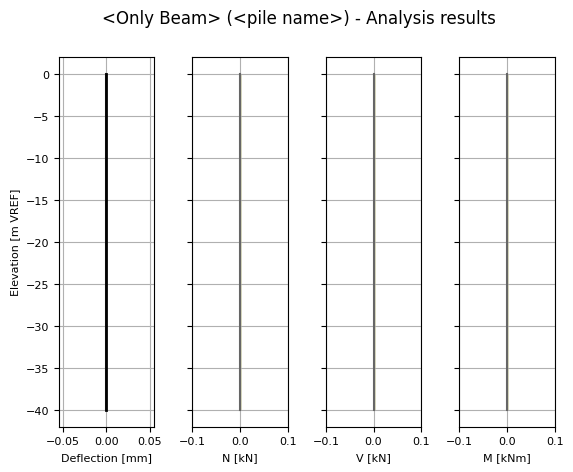

In [1]:
from openpile.construct import Pile, Model


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=7.5, wt=0.075
)

# Create Model
M = Model(name="<Only Beam>", pile=p)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Ty=True)
M.set_support(elevation=-40, Tx=True)
M.set_support(elevation=0, Ty=True)
M.set_pointdisplacement(elevation=-20,Ty=0.1)
# Apply axial and lateral loads
# M.set_pointload(elevation=-20, Px=1, Py=5)

# Run analysis
import matplotlib.pyplot as plt

Result = M.solve()

# plot the results
Result.plot()


In [7]:
M.boundary_conditions
M.global_disp.head(20)

,x [m],y [m],Tx [m],Ty [m],Rz [rad]
Node no.,,,,,
0,0.0,0.0,0.0,0.0,0.0
1,-0.5,0.0,0.0,0.0,0.0
2,-1.0,0.0,0.0,0.0,0.0
3,-1.5,0.0,0.0,0.0,0.0
4,-2.0,0.0,0.0,0.0,0.0
5,-2.5,0.0,0.0,0.0,0.0
6,-3.0,0.0,0.0,0.0,0.0
7,-3.5,0.0,0.0,0.0,0.0
8,-4.0,0.0,0.0,0.0,0.0
